# Example of modelling of growth units

In [18]:
from openalea.lpy import *
import pgljupyter
import matplotlib.pyplot as plt
from random import uniform

# Growth 

Growth of organs is simulated using a logistic function $\frac{L}{1 + \exp{-\frac{t-tip}{b}}}$

In [19]:
from math import exp

def growth_logistic(ttime, finalsize, tip, b):
    return finalsize / (1 + exp(-(ttime-tip)/b ))


Parameters of the growth for the different organs along the axis

In [20]:
LLeaf = [4.9, 5.8, 6., 6.9, 7.5, 8.9, 8.8, 9.6, 7.]
tipLeaf = [0.0, 1.8, 3.7, 5.5, 7.1, 8.8, 10.4, 11.9, 13.4]
bLeaf = 1.7 

LIn = [1., 1.2, 1.8, 2.7, 3.5, 4.2, 4.2, 3.5, 1.7]
tipIn = [0.2, 1.9, 3.5, 5.1, 6.7, 8.4, 10.0, 11.6, 13.3]
bIn = 1.3

nbMetamers = len(LLeaf)
maxTime = 25
dt = 0.1

leaf_size = lambda i, t: growth_logistic(t, LLeaf[i], tipLeaf[i], bLeaf)
internode_size = lambda i, t: growth_logistic(t, LIn[i], tipIn[i], bIn)

A plot of the different kinetics

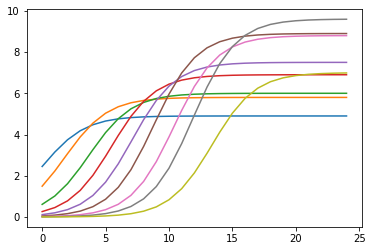

In [21]:
timerange = range(0,maxTime)
for i in range(nbMetamers):
    plt.plot(timerange,[leaf_size(i,t) for t in timerange] )
plt.show()


# The Lsystem model

Rules are based on parameters and functions defined on previous cells. 3D display is automatically displayed. Buttons allow to navigate in the different steps of the simulation.

In [40]:
%%lpy  -u dm -w 4 -s 600,400

Axiom: 
    nproduce _(0.3)@Gc 
    for i in range(nbMetamers):
        nproduce I(i,0)/(137)[[^(60)L(i,0)]]

derivation length: int(maxTime//dt)
production:
I(i,t) --> I(i,t+dt)
L(i,t) --> L(i,t+dt)

interpretation:
I(i,t) --> F(internode_size(i,t))
L(i,t) :
    l = leaf_size(i,t)
    nproduce SetColor(200,10,10)_(0.1) ^(t*0.3)F(l/6)[+(90)~l(l/2)][-(90)~l(l/2)]
    nproduce F(l/6)[+(60)~l(l/2)][-(60)~l(l/2)]F(l/6)~l(l/2)


LsystemWidget(derivationLength=249, is_magic=True, scene={'data': b'x\xda\xad\x99\x0fl\x13\xd7\x1d\xc7\xcf$\x9…